### NORMALIZACIÓN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kstest
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None 

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Cargamos el csv del dia anterior
df = pd.read_csv("../ficheros/diamons_01.csv", index_col = 0).reset_index(drop= True) 
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


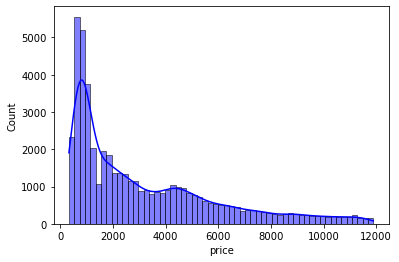

In [3]:
#Realizamos un histograma de nuestra columna respuesta para ver como estan distribuidos los datos
sns.histplot(df["price"], kde = True, color = "blue");

Vamos a tratar de normalizar nuestra columna "price" dado que no era normal. Empezamos por la logarítmica.

In [4]:
df["price_log"] = df["price"].apply(lambda x: np.log(x) if x > 0 else 0)

In [5]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897


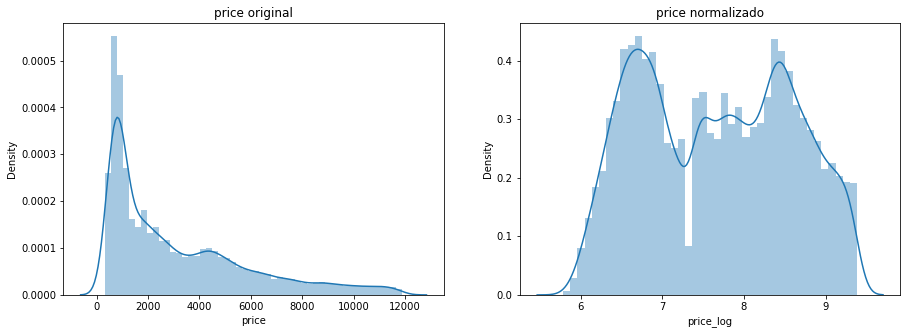

In [6]:
#Realizamos la grafica para comprobar como se ha modificado la distribución de los datos
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df["price"] ,ax = axes[0])
sns.distplot(df["price_log"], ax = axes[1]);

In [7]:
# Realizamos el metodo Kolmogorov para comprobar de  manera analítica
kstest(df["price_log"],"norm")

KstestResult(statistic=0.9999999964150826, pvalue=0.0)

Aunque visualmente, la gráfica ha variado mucho, el p-valor sigue dandonos 0. Vamos a tratar normalizar ahora con boxcox

In [8]:
df['price_box'], lambda_ajustada = stats.boxcox(df['price'])

In [9]:
lambda_ajustada

-0.025258321157116997

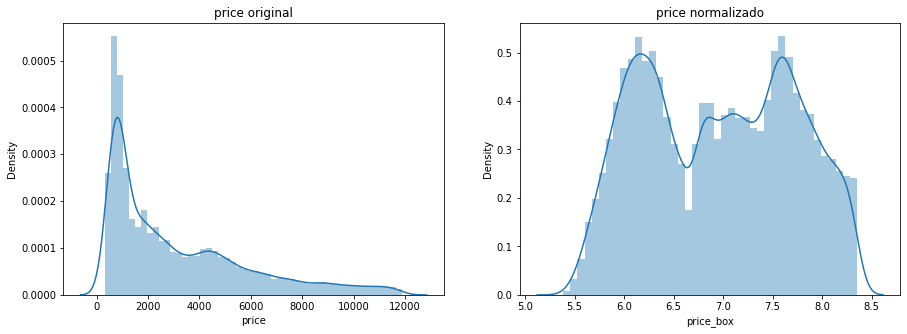

In [10]:
#Realizamos la grafica para comprobar como se ha modificado la distribución de los datos
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df['price_box'], ax = axes[1]);

In [11]:
# Realizamos el metodo Kolmogorov para comprobar de  manera analítica
kstest(df["price_box"],"norm")

KstestResult(statistic=0.9999999635442165, pvalue=0.0)

Nos sigue dando 0 con lo cual vamos a probar, Sklearn MinMaxScaller

In [12]:
# extraemos las columnas numéricas
numericas = df.select_dtypes(include = np.number)
# construir el modelo de escalador
minmax = MinMaxScaler()
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(df[['price']])
# transformamos los datos
X_normalizadas = minmax.transform(df[["price"]])

In [13]:
X_normalizadas.min(axis=0)

array([0.])

In [14]:
X_normalizadas.max(axis=0)

array([1.])

In [15]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["price_Sklearn"])
numericas_minmax.head(2)

,price_Sklearn
0,0.0
1,0.0


In [16]:
#comprobamos en la columna los datos
numericas_minmax.describe()

,price_Sklearn
count,50242.000000
mean,0.245039
std,0.239047
min,0.000000
25%,0.050597
50%,0.158191
75%,0.375541
max,1.000000


In [17]:
#incluimos la columna al dataframe
df["price_Sklearn"] = numericas_minmax
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_log,price_box,price_Sklearn
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,5.383844,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,5.383844,0.0


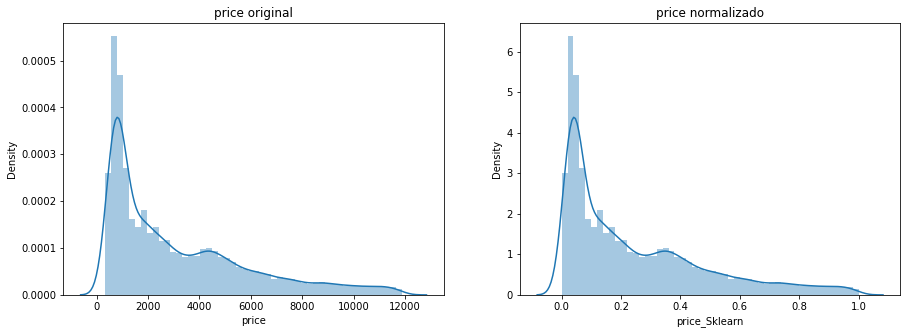

In [18]:
#Realizamos la grafica para comprobar como se ha modificado la distribución de los datos
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df['price_Sklearn'], ax = axes[1]);

In [19]:
# Realizamos el metodo Kolmogorov para comprobar de  manera analítica
kstest(df["price_Sklearn"],"norm")

KstestResult(statistic=0.5005322425847836, pvalue=0.0)

Con este metodo tampoco conseguimos normalizar, a continuacón haremos el método manual

In [20]:
media = df["price"].mean()
maximo = df["price"].max() 
minimo = df["price"].min()

In [21]:
df["price_NORM"] = (df["price"] - media) / (maximo - minimo )

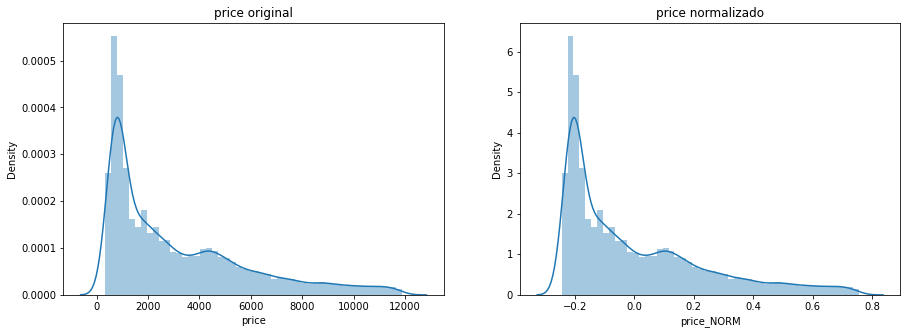

In [22]:
#Realizamos la grafica para comprobar como se ha modificado la distribución de los datos
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('price original')
axes[1].set_title('price normalizado')

sns.distplot(df['price'] ,ax = axes[0])
sns.distplot(df["price_NORM"], ax = axes[1]);

In [23]:
# Realizamos el metodo Kolmogorov para comprobar de  manera analítica
kstest(df["price_NORM"],"norm")

KstestResult(statistic=0.40371395438214325, pvalue=0.0)

Vemos que no lo podemos normalizar, con lo cual nos quedamos con la principal. Por ese motivo no guardamos el csv porque vamos a trabajar con el original.